In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
 #   print(coordinate[0], coordinate[1])

29.32754455129414 79.55073475261787
-12.388879602190187 0.9781051884689873
-24.731344934968035 -55.031758766236734
24.192578510424696 -73.35268367719543
86.30374343834049 -145.92235416262994
-67.91198622015386 7.3597411625307245
2.647657676814447 50.732484263293
-44.59327788341337 -76.9153428721022
79.48023311575741 121.56751215375596
-79.16599408184145 -82.81868047992009
-87.43596350382128 -159.86191748461144
30.829671329923556 -96.68390229366017
-83.23154875908777 -56.01187075235066
-2.0905651671540397 -92.40369652927957
17.443046274413206 141.13372571437327
-62.76015967907766 135.18299663812383
-68.70916325938414 2.6469429710719226
-75.01155845234831 172.7713589663603
14.993948833925486 39.530981093429034
-56.13418756267789 -54.86829414910913
73.12451406430534 4.551114250647373
50.058360308429144 40.69138131331988
49.88375726954291 -0.023645370775824404
-47.740914991597116 -63.8132928311077
-27.1887121029298 -139.43709748232246
-22.287215279916282 -109.94410427880048
23.312770367809

-19.740229817635267 -150.62267171661117
-87.21375200383822 -7.40124509955163
75.01100930288999 62.95660664951296
-61.24814645628343 -122.96340431069017
-88.79278076070571 156.09130291042868
-47.53270346664376 8.391164017707098
-56.17579444393682 -137.69052417977798
-59.134277291180524 21.286886171454455
67.95992714505002 150.92635721797262
15.396266327486288 123.96045804403548
-7.622692986747893 -78.08687599327341
9.959173439747602 -149.94732691007792
-66.85162225924718 5.5938944630678975
-37.603527510542946 151.039832173072
23.75824914879263 -114.89131928595779
21.170602953750333 -144.41156175857108
27.730189486892144 -29.880153239579585
17.919671953348853 -37.11617663698743
-24.821489067062828 38.483863171734015
73.31251926445032 145.83822405083316
79.85473626826408 57.19524773754631
32.338909813993666 -42.6585233445455
-44.375931904591496 36.597054932112684
-87.76211543470075 143.86644442006695
-63.52640767013811 -137.60645727153732
33.78246931685108 -8.367092549258501
-3.5171918276

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | eenhana
Processing Record 2 of Set 1 | pasni
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | isangel
Processing Record 5 of Set 1 | nome
Processing Record 6 of Set 1 | concordia
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | shizunai
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | mogadishu
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | pontes e lacerda
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | ahipara
Processing Record 20 of Set 1 | kirkuk
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | hilo
Process

Processing Record 41 of Set 4 | yantal
Processing Record 42 of Set 4 | gazojak
Processing Record 43 of Set 4 | constitucion
Processing Record 44 of Set 4 | plaster rock
Processing Record 45 of Set 4 | oskarshamn
Processing Record 46 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 4 | boca do acre
Processing Record 48 of Set 4 | svetlaya
Processing Record 49 of Set 4 | imphal
Processing Record 50 of Set 4 | gohpur
Processing Record 1 of Set 5 | atar
Processing Record 2 of Set 5 | maralal
Processing Record 3 of Set 5 | dzhebariki-khaya
Processing Record 4 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 5 | arraial do cabo
Processing Record 6 of Set 5 | homer
Processing Record 7 of Set 5 | nishihara
Processing Record 8 of Set 5 | shache
Processing Record 9 of Set 5 | juneau
Processing Record 10 of Set 5 | leh
Processing Record 11 of Set 5 | mikhaylovka
Processing Record 12 of Set 5 | sao joao da barra
Processing Record 13 of Set 5 

Processing Record 32 of Set 8 | launceston
Processing Record 33 of Set 8 | brae
Processing Record 34 of Set 8 | rawson
Processing Record 35 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 36 of Set 8 | ambilobe
Processing Record 37 of Set 8 | finschhafen
Processing Record 38 of Set 8 | santa lucia
Processing Record 39 of Set 8 | lata
Processing Record 40 of Set 8 | lima
Processing Record 41 of Set 8 | tomatlan
Processing Record 42 of Set 8 | clinton
Processing Record 43 of Set 8 | burica
City not found. Skipping...
Processing Record 44 of Set 8 | marquette
Processing Record 45 of Set 8 | rostaq
City not found. Skipping...
Processing Record 46 of Set 8 | auki
Processing Record 47 of Set 8 | margate
Processing Record 48 of Set 8 | mahibadhoo
Processing Record 49 of Set 8 | mayya
Processing Record 50 of Set 8 | kamaishi
Processing Record 1 of Set 9 | pecos
Processing Record 2 of Set 9 | longyearbyen
Processing Record 3 of Set 9 | vardo
Processing Record 4 of Set 9 |

Processing Record 20 of Set 12 | iskateley
Processing Record 21 of Set 12 | changji
Processing Record 22 of Set 12 | lake city
Processing Record 23 of Set 12 | eskasem
City not found. Skipping...
Processing Record 24 of Set 12 | sataua
City not found. Skipping...
Processing Record 25 of Set 12 | road town
Processing Record 26 of Set 12 | shakawe
Processing Record 27 of Set 12 | mikkeli
Processing Record 28 of Set 12 | saquarema
Processing Record 29 of Set 12 | necochea
Processing Record 30 of Set 12 | inhambane
Processing Record 31 of Set 12 | ulladulla
Processing Record 32 of Set 12 | constantine
Processing Record 33 of Set 12 | grootfontein
Processing Record 34 of Set 12 | gobabis
Processing Record 35 of Set 12 | onguday
Processing Record 36 of Set 12 | honolulu
Processing Record 37 of Set 12 | energetik
Processing Record 38 of Set 12 | kingman
Processing Record 39 of Set 12 | redmond
Processing Record 40 of Set 12 | waw
Processing Record 41 of Set 12 | san andres
Processing Record 4

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# New column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Eenhana,NA,2022-08-29 20:06:44,-17.4667,16.3333,70.25,19,3,6.78
1,Pasni,PK,2022-08-29 20:06:44,25.2631,63.4710,78.85,84,100,7.72
2,Punta Arenas,CL,2022-08-29 20:06:45,-53.1500,-70.9167,48.31,66,75,5.75
3,Isangel,VU,2022-08-29 20:01:48,-19.5500,169.2667,71.71,80,100,14.29
4,Nome,US,2022-08-29 20:03:35,64.5011,-165.4064,44.67,77,100,3.44
5,Concordia,AR,2022-08-29 20:06:45,-31.3930,-58.0209,59.07,51,0,11.99
6,Carnarvon,AU,2022-08-29 20:06:45,-24.8667,113.6333,62.53,43,0,16.62
7,Shizunai,JP,2022-08-29 20:06:27,42.3339,142.3669,65.10,82,100,6.67
8,Busselton,AU,2022-08-29 20:06:46,-33.6500,115.3333,47.66,85,21,6.15
9,Port Lincoln,AU,2022-08-29 20:06:46,-34.7333,135.8667,50.77,62,63,12.17


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

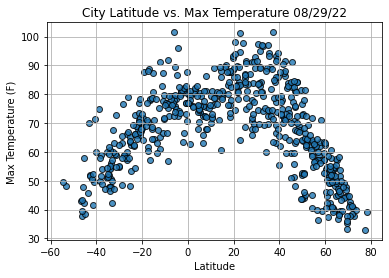

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

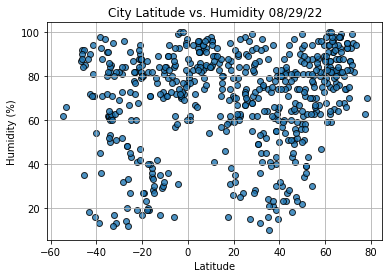

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

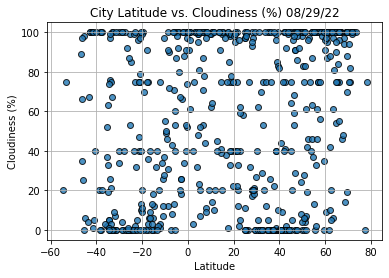

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

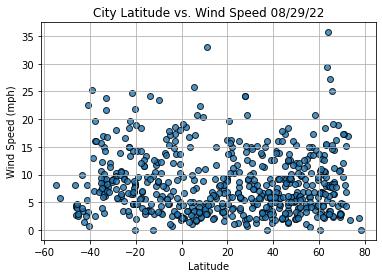

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()